<a href="https://colab.research.google.com/github/abhinavnautiyalDS/flight_price_prediction/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split



## **DATA PREPROCESSING**

In [2]:
df=pd.read_csv("/content/final flight dataset.csv")
df1=df.sample(1000)
df2=df.sample(1000)

df = pd.concat([df1, df2], axis=0)



In [3]:
df.shape

(2000, 11)

**The columns ARRIVAL_TIME, Duration, and DATE_OF_JOURNEY_2 can be dropped because Dep_Time is already represented in DEPARTURE_TIME and ARRIVAL_TIME, Duration is covered in DURATIONMIN, and the information from DEPARTURE_TIME is also captured in ARRIVAL_TIME.**

In [4]:


df.drop(['ARRIVAL_TIME','Duration','DATE_OF_JOURNEY_2','Dep_Time'],inplace=True,axis=1)


**Now, I will extract the day of travel and month of travel from DEPARTURE_TIME, and the time of day from Dep_Time.**

In [5]:

# Convert DEPARTURE_TIME to datetime
df['DEPARTURE_TIME'] = pd.to_datetime(df['DEPARTURE_TIME'])

# Extract day and month
df['Day'] = df['DEPARTURE_TIME'].dt.day
df['Month'] = df['DEPARTURE_TIME'].dt.month
df['DayOfweek']=df['DEPARTURE_TIME'].dt.day_name()

In [6]:
df

,Airline,Source,Destination,Total_Stops,Price,DEPARTURE_TIME,DURATIONMIN,Day,Month,DayOfweek
773,Multiple carriers,Delhi,Cochin,1 stop,6795,2019-06-09 11:40:00,830,9,6,Sunday
575,Air India,Banglore,New Delhi,non-stop,4966,2019-03-09 21:10:00,165,9,3,Saturday
40,Multiple carriers,Delhi,Cochin,1 stop,9646,2019-05-21 07:05:00,665,21,5,Tuesday
454,IndiGo,Delhi,Cochin,1 stop,6818,2019-06-06 05:05:00,425,6,6,Thursday
640,Jet Airways,Kolkata,Banglore,1 stop,14781,2019-05-21 14:05:00,345,21,5,Tuesday
...,...,...,...,...,...,...,...,...,...,...
947,Jet Airways,Kolkata,Banglore,1 stop,13941,2019-05-12 21:10:00,775,12,5,Sunday
735,IndiGo,Kolkata,Banglore,1 stop,5069,2019-05-09 08:10:00,290,9,5,Thursday
51,Jet Airways,Kolkata,Banglore,1 stop,12121,2019-05-01 09:35:00,1520,1,5,Wednesday
914,Air Asia,Kolkata,Banglore,non-stop,4508,2019-06-06 10:20:00,155,6,6,Thursday


**Now, I will create a new feature called daytime by categorizing Dep_Time into time slots: Morning, Afternoon, Evening, Night, and Midnight.**

In [7]:
#now i fill make daytime: Morning, afternoon, everning,night, midnight
# Extract hour
df['Hour'] = df['DEPARTURE_TIME'].dt.hour
# Define function to categorize time of day
def get_daytime(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour <= 23:
        return 'Night'
    else:  # 0 <= hour < 5
        return 'Midnight'

# Apply function to create DayTime column
df['DayTime'] = df['Hour'].apply(get_daytime)


In [8]:
df

,Airline,Source,Destination,Total_Stops,Price,DEPARTURE_TIME,DURATIONMIN,Day,Month,DayOfweek,Hour,DayTime
773,Multiple carriers,Delhi,Cochin,1 stop,6795,2019-06-09 11:40:00,830,9,6,Sunday,11,Morning
575,Air India,Banglore,New Delhi,non-stop,4966,2019-03-09 21:10:00,165,9,3,Saturday,21,Night
40,Multiple carriers,Delhi,Cochin,1 stop,9646,2019-05-21 07:05:00,665,21,5,Tuesday,7,Morning
454,IndiGo,Delhi,Cochin,1 stop,6818,2019-06-06 05:05:00,425,6,6,Thursday,5,Morning
640,Jet Airways,Kolkata,Banglore,1 stop,14781,2019-05-21 14:05:00,345,21,5,Tuesday,14,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
947,Jet Airways,Kolkata,Banglore,1 stop,13941,2019-05-12 21:10:00,775,12,5,Sunday,21,Night
735,IndiGo,Kolkata,Banglore,1 stop,5069,2019-05-09 08:10:00,290,9,5,Thursday,8,Morning
51,Jet Airways,Kolkata,Banglore,1 stop,12121,2019-05-01 09:35:00,1520,1,5,Wednesday,9,Morning
914,Air Asia,Kolkata,Banglore,non-stop,4508,2019-06-06 10:20:00,155,6,6,Thursday,10,Morning


In [9]:
#now remove DEPARTURE_TIME
df.drop('DEPARTURE_TIME',inplace=True,axis=1)

In [10]:
df.drop('Hour',inplace=True,axis=1)

**Converting Durationmin in hour**

In [11]:
#converting Durationmin in hour
df['DURATIONHour']=df['DURATIONMIN']/60

In [12]:
df['DURATIONHour']=df['DURATIONHour'].astype('int')

In [13]:
df.drop('DURATIONMIN',inplace=True,axis=1)

### **Data Endoding**


For this i have used one-hot-encoding

In [14]:
#data preprocessing

cat_cols = ['Airline', 'Source', 'Destination','Total_Stops','DayOfweek','DayTime']
df_label_encoded=df.copy()

# One-Hot Encode with binary format (0/1)
df_label_encoded= pd.get_dummies(df, columns=cat_cols, drop_first=True).astype('int')  # drop_first=True to avoid dummy variable trap



In [15]:
df_label_encoded

,Price,Day,Month,DURATIONHour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,DayOfweek_Monday,DayOfweek_Saturday,DayOfweek_Sunday,DayOfweek_Thursday,DayOfweek_Tuesday,DayOfweek_Wednesday,DayTime_Evening,DayTime_Midnight,DayTime_Morning,DayTime_Night
773,6795,9,6,13,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
575,4966,9,3,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
40,9646,21,5,11,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
454,6818,6,6,7,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
640,14781,21,5,5,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,13941,12,5,12,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
735,5069,9,5,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
51,12121,1,5,25,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
914,4508,6,6,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:

# Reorder columns to move 'Price' to the last
cols = [col for col in df_label_encoded.columns if col != 'Price'] + ['Price']
df_label_encoded = pd.DataFrame(df_label_encoded[cols])

# Display resuld
df_label_encoded


,Day,Month,DURATIONHour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,DayOfweek_Saturday,DayOfweek_Sunday,DayOfweek_Thursday,DayOfweek_Tuesday,DayOfweek_Wednesday,DayTime_Evening,DayTime_Midnight,DayTime_Morning,DayTime_Night,Price
773,9,6,13,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,6795
575,9,3,2,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4966
40,21,5,11,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,9646
454,6,6,7,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,6818
640,21,5,5,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,14781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,12,5,12,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,13941
735,9,5,4,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,5069
51,1,5,25,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,12121
914,6,6,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4508


### **Data Scaling**

For this i have used min-max scaling

In [17]:
#scaling

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# List numeric columns you want to scale
num_cols = ['DURATIONHour', 'Price','Month','Day']  # replace/add other numerical column names if needed

# Apply min-max scaling and replace in DataFrame
df_label_encoded[num_cols] = scaler.fit_transform(df_label_encoded[num_cols])

# Display the scaled DataFram
df_label_encoded.head()

,Day,Month,DURATIONHour,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,DayOfweek_Saturday,DayOfweek_Sunday,DayOfweek_Thursday,DayOfweek_Tuesday,DayOfweek_Wednesday,DayTime_Evening,DayTime_Midnight,DayTime_Morning,DayTime_Night,Price
773,0.307692,1.000000,0.342105,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0.096093
575,0.307692,0.000000,0.052632,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.059705
40,0.769231,0.666667,0.289474,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0.152813
454,0.192308,1.000000,0.184211,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.096550
640,0.769231,0.666667,0.131579,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0.254974


### **Model splitting**

In [18]:
# Features and target
X = df_label_encoded.drop('Price', axis=1)
y = df_label_encoded['Price']

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def Evaluation_Metrics_Regression(model_object, X_test, Y_test):
    """
    Evaluate a regression model with key metrics.
    """
    Y_pred = model_object.predict(X_test)

    metrics = {
        'R2 Score': r2_score(Y_test, Y_pred),
        'MAE': mean_absolute_error(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred),
        'RMSE': mean_squared_error(Y_test, Y_pred)**(0.5)
    }

    return pd.DataFrame.from_dict(metrics, orient='index', columns=['Score'])


### **Feature Selection**

<Axes: >

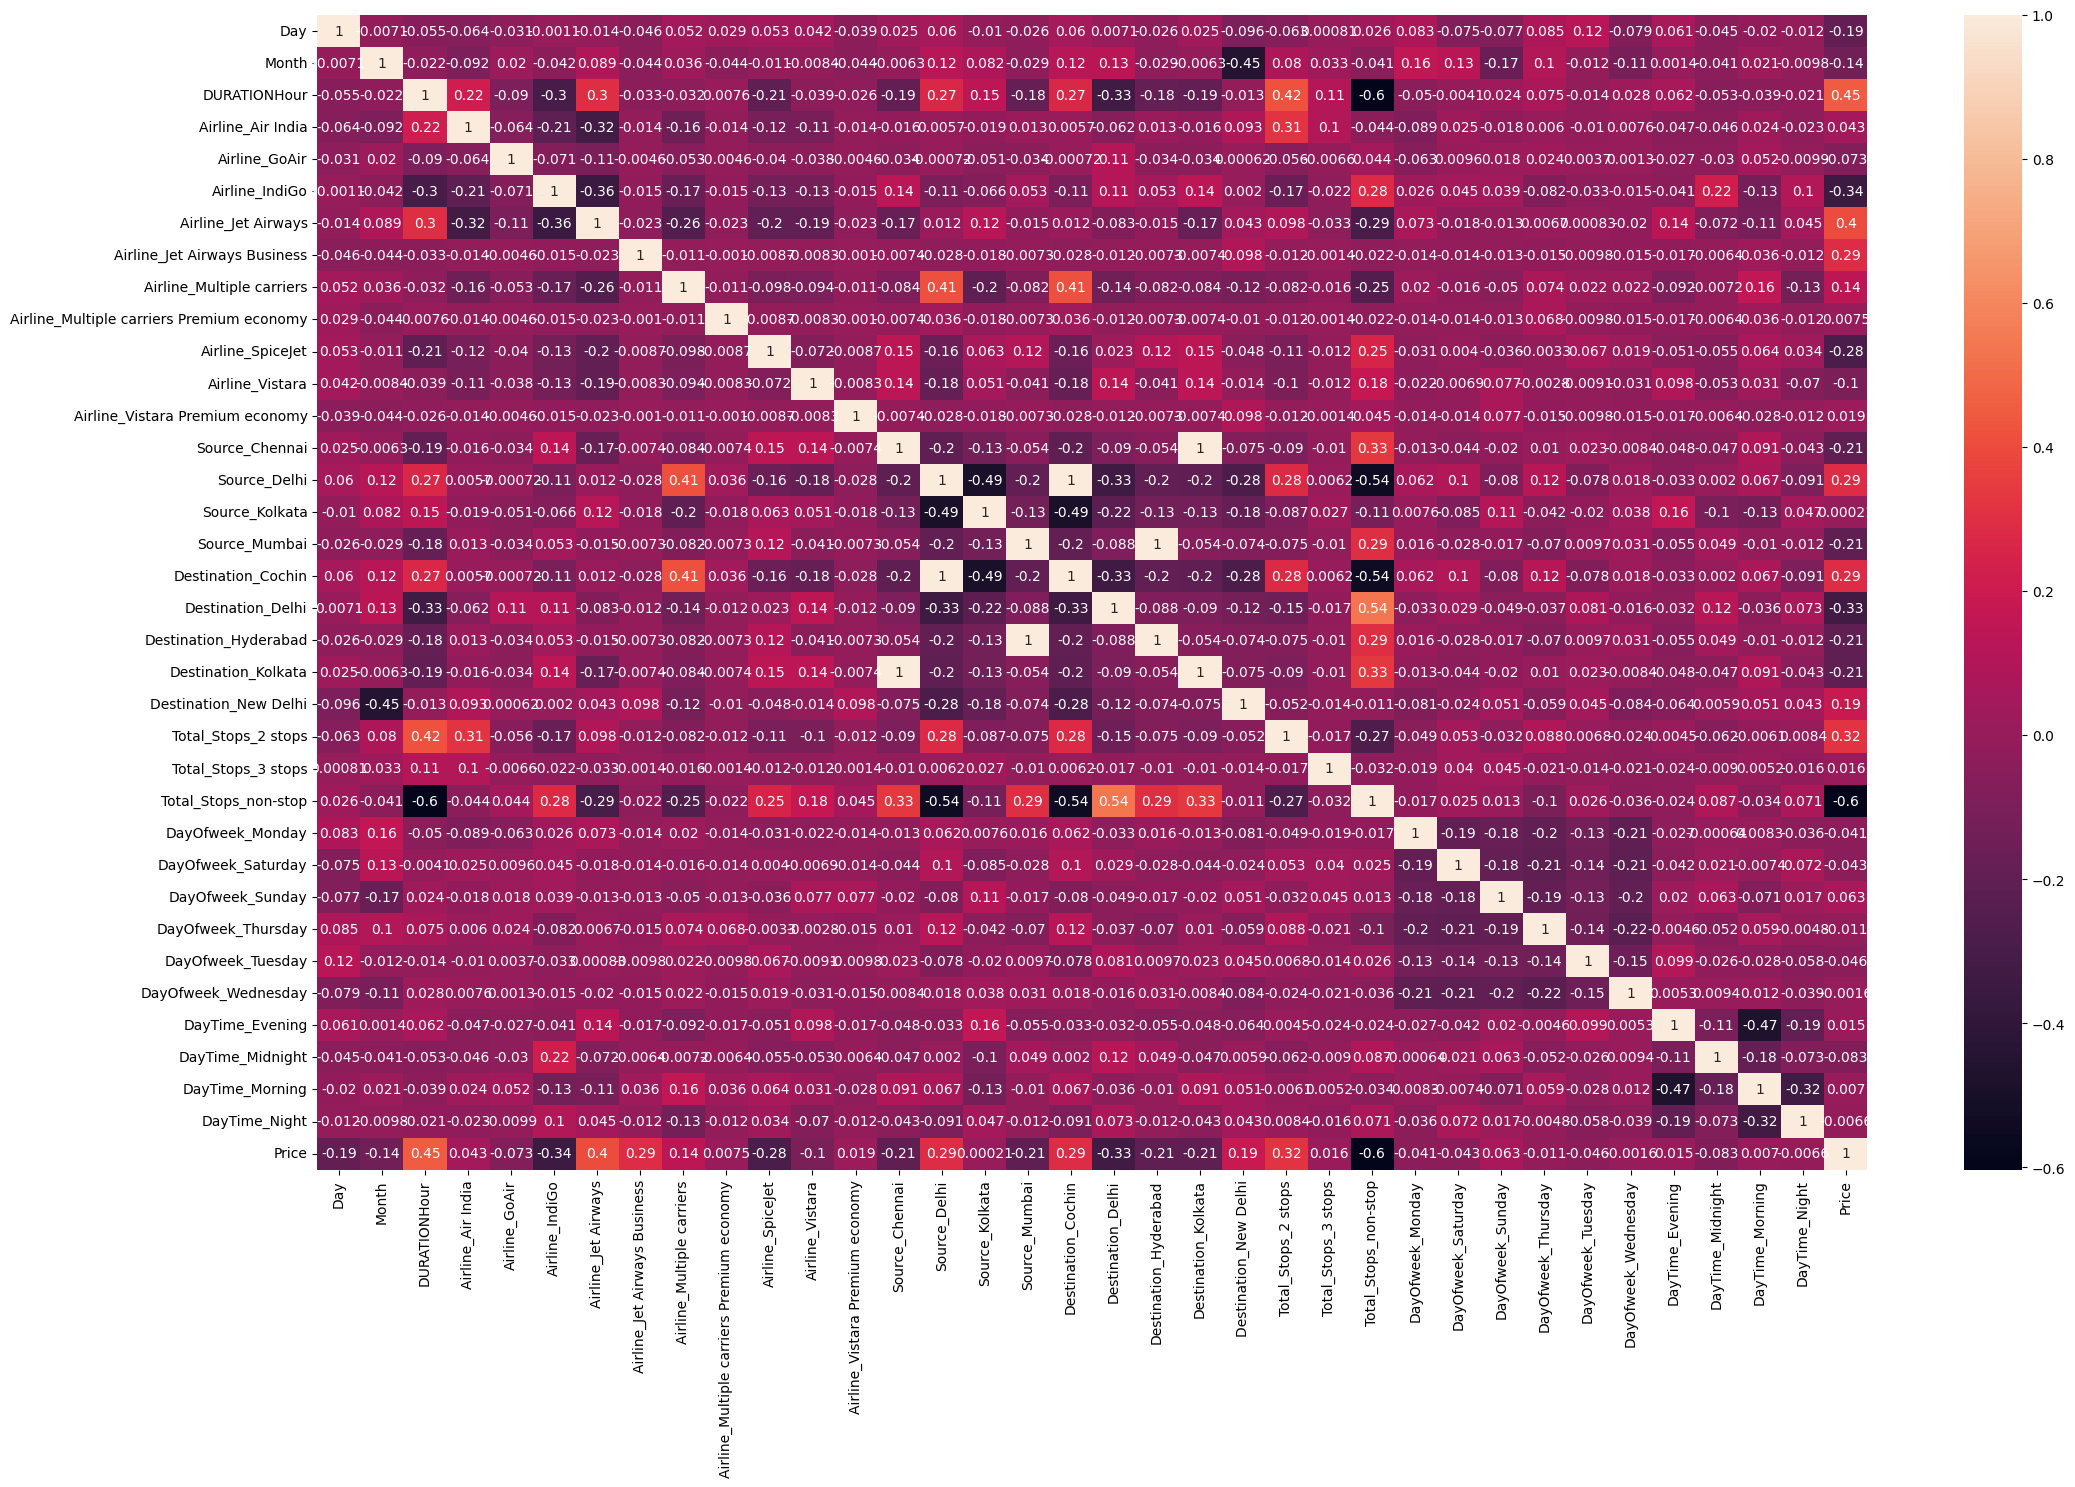

In [20]:
fig,ax=plt.subplots(figsize=(25,15))
sns.heatmap(df_label_encoded.corr(),annot=True)

1. **lasso regression**

In [21]:

#using lasso regression


import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_label_encoded.drop('Price', axis=1)
y = df_label_encoded['Price']



# Try multiple alpha values
alphas = [0.0001, 0.001, 0.01,0.1]

# Dictionary to store coefficients
coef_dict = {}

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coef_dict[f'alpha_{alpha}'] = lasso.coef_

# Create DataFrame with features as index and alphas as columns
coef_variation_df = pd.DataFrame(coef_dict, index=X.columns)

# Optionally, round for neatness
coef_variation_df = coef_variation_df.round(4)

# Show how coefficients vary with alpha
coef_variation_df


,alpha_0.0001,alpha_0.001,alpha_0.01,alpha_0.1
Day,-0.0407,-0.0359,-0.0000,-0.0
Month,-0.0305,-0.0299,-0.0000,-0.0
DURATIONHour,0.0060,0.0000,0.0000,0.0
Airline_Air India,0.0190,0.0000,0.0000,0.0
Airline_GoAir,0.0000,-0.0000,-0.0000,-0.0
Airline_IndiGo,-0.0075,-0.0242,-0.0000,-0.0
Airline_Jet Airways,0.0693,0.0423,0.0141,0.0
Airline_Jet Airways Business,0.6895,0.0000,0.0000,0.0
Airline_Multiple carriers,0.0546,0.0206,0.0000,0.0
Airline_Multiple carriers Premium economy,0.0000,0.0000,0.0000,0.0


In [22]:
nonimportant_features1=set(['Airline_GoAir','Airline_Multiple carriers Premium economy','Airline_Vistara Premium economy','Total_Stops_3 stops'])

2. **Wrapping Method**

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()

# Sequential Feature Selector (Forward selection)
sfs = SequentialFeatureSelector(estimator=model,
                                n_features_to_select=5,
                                direction='forward',
                                scoring='r2',
                                cv=5)

sfs.fit(X_train, Y_train)

# Get selected feature names
selected_features = X_train.columns[sfs.get_support()]

nonimportant_features=set([i for i in X_train.columns if i not in selected_features])


In [24]:
nonimportant_features1.intersection(nonimportant_features)

{'Airline_GoAir',
 'Airline_Multiple carriers Premium economy',
 'Airline_Vistara Premium economy',
 'Total_Stops_3 stops'}

In [25]:
#dropping common columns
df_label_encoded.drop(nonimportant_features1.intersection(nonimportant_features),axis=1,inplace=True)

In [26]:
df_label_encoded

,Day,Month,DURATIONHour,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,...,DayOfweek_Saturday,DayOfweek_Sunday,DayOfweek_Thursday,DayOfweek_Tuesday,DayOfweek_Wednesday,DayTime_Evening,DayTime_Midnight,DayTime_Morning,DayTime_Night,Price
773,0.307692,1.000000,0.342105,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0.096093
575,0.307692,0.000000,0.052632,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.059705
40,0.769231,0.666667,0.289474,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0.152813
454,0.192308,1.000000,0.184211,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.096550
640,0.769231,0.666667,0.131579,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.254974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.423077,0.666667,0.315789,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.238262
735,0.307692,0.666667,0.105263,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.061754
51,0.000000,0.666667,0.657895,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0.202053
914,0.192308,1.000000,0.052632,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.050593


###**Evaulation Metrics and Hyperparameter Tuning**

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def Evaluation_Metrics_Regression(model_object, X_test, Y_test):
    """
    Evaluate a regression model with key metrics.
    """
    Y_pred = model_object.predict(X_test)

    metrics = {
        'R2 Score': r2_score(Y_test, Y_pred),
        'MAE': mean_absolute_error(Y_test, Y_pred),
        'MSE': mean_squared_error(Y_test, Y_pred),
        'RMSE': mean_squared_error(Y_test, Y_pred)**(0.5)
    }
    sns.scatterplot(x=Y_test,y=Y_pred,color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    return pd.DataFrame.from_dict(metrics, orient='index', columns=['Score'])


In [28]:


def HyperparameterTuning(X, y, model_name, search_type='grid', n_iter_random=10):
    # Select model and hyperparameter grid
    if model_name == LR:
        model = LinearRegression()
        param_grid = {
            'fit_intercept': [True, False],
        }

    elif model_name == DT:
        model = DecisionTreeRegressor(random_state=42)
        param_grid = {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

    elif model_name == RF:
        model = RandomForestRegressor(random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

    else:
        raise ValueError("Invalid model name. Choose from 'LR', 'DTR', or 'RFR'.")

    # Hyperparameter tuning
    if search_type == 'grid':
        search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    elif search_type == 'random':
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n_iter_random, cv=5, scoring='r2', random_state=42, n_jobs=-1)
    else:
        raise ValueError("Invalid search_type. Choose 'grid' or 'random'.")

    # Fit and get best model/params
    search.fit(X, y)
    best_model = search.best_estimator_
    best_params = search.best_params_

    return best_model, best_params


### **LINER REGRESSION**

In [29]:
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

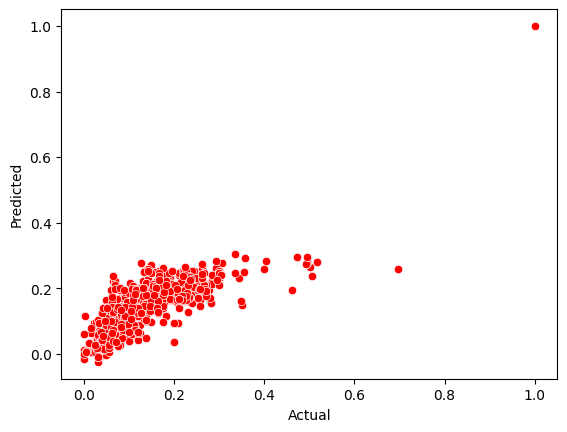

             Score
R2 Score  0.639945
MAE       0.038403
MSE       0.003006
RMSE      0.054829


In [30]:
print(Evaluation_Metrics_Regression(LR, X_train, Y_train))

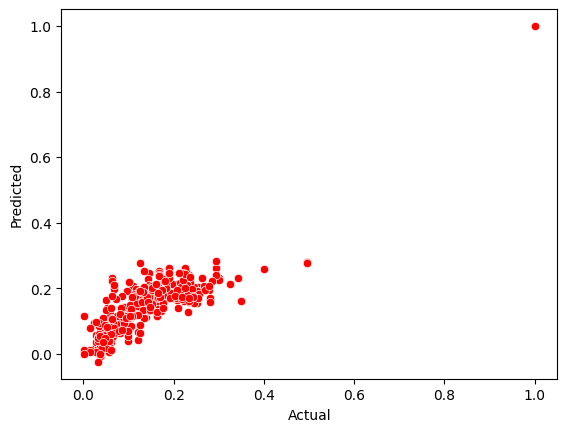

             Score
R2 Score  0.675564
MAE       0.041413
MSE       0.003258
RMSE      0.057082


In [32]:
print(Evaluation_Metrics_Regression(LR, X_test, Y_test))

**Hyperparameter Tuning**

In [33]:
HyperparameterTuning(X_train, Y_train, LR, search_type='grid', n_iter_random=10)

(LinearRegression(fit_intercept=False), {'fit_intercept': False})

**Retrain my model on best parameter**

In [34]:
LR1=LinearRegression(fit_intercept=False)
LR1.fit(X_train,Y_train)

LinearRegression(fit_intercept=False)

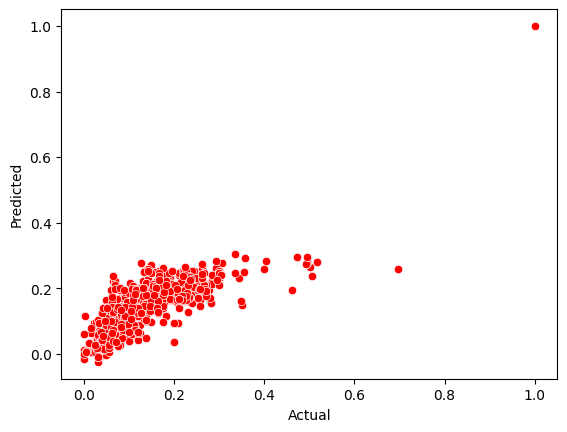

             Score
R2 Score  0.639945
MAE       0.038403
MSE       0.003006
RMSE      0.054829


In [35]:
print(Evaluation_Metrics_Regression(LR1, X_train, Y_train))


### **DecisionTreeRegressor**

In [36]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

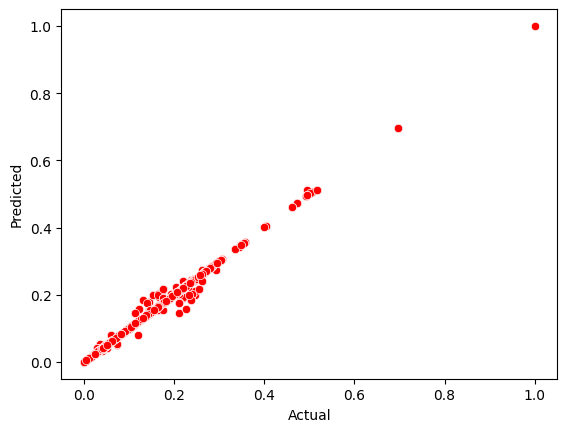

             Score
R2 Score  0.994628
MAE       0.001332
MSE       0.000045
RMSE      0.006697


In [37]:
print(Evaluation_Metrics_Regression(DT, X_train, Y_train))

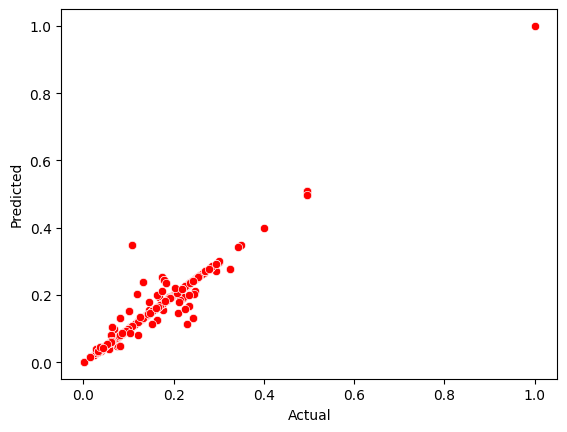

             Score
R2 Score  0.924935
MAE       0.008786
MSE       0.000754
RMSE      0.027457


In [38]:
print(Evaluation_Metrics_Regression(DT, X_test, Y_test))

**Hyperparamter tuning**

In [39]:
HyperparameterTuning(X_train, Y_train, DT, search_type='grid', n_iter_random=10)

(DecisionTreeRegressor(random_state=42),
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2})

**Retrain my model on best paramters**

In [40]:
DT1=DecisionTreeRegressor(max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
DT1.fit(X_train,Y_train)

DecisionTreeRegressor()

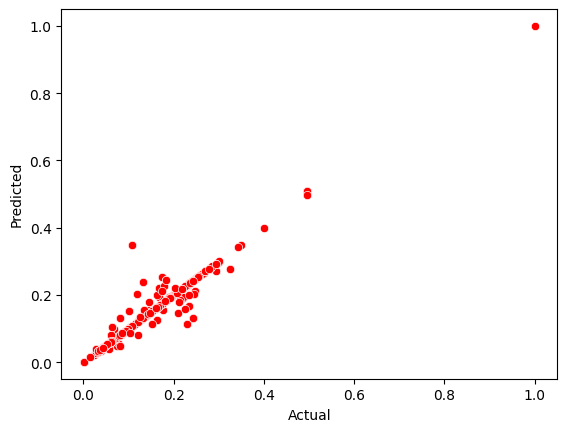

After Tuning              Score
R2 Score  0.923918
MAE       0.009064
MSE       0.000764
RMSE      0.027642


In [41]:
print("After Tuning",Evaluation_Metrics_Regression(DT1, X_test, Y_test))

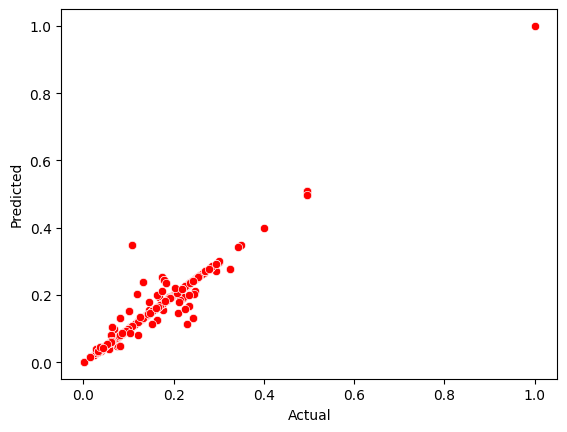

Before Tuning              Score
R2 Score  0.924935
MAE       0.008786
MSE       0.000754
RMSE      0.027457


In [42]:
print("Before Tuning",Evaluation_Metrics_Regression(DT, X_test, Y_test))

### **RandomForestReggressor**

In [43]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

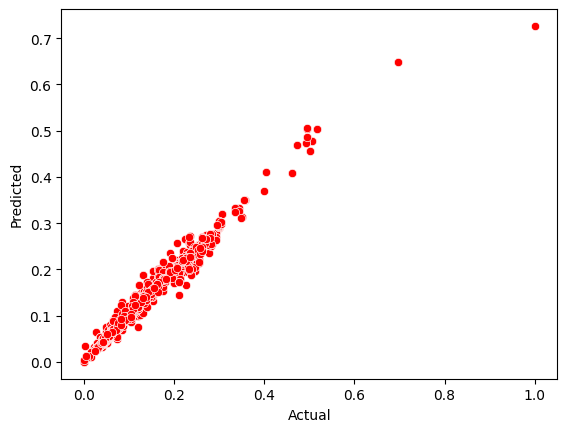

             Score
R2 Score  0.979099
MAE       0.006629
MSE       0.000175
RMSE      0.013210


In [44]:
print(Evaluation_Metrics_Regression(RF, X_train, Y_train))

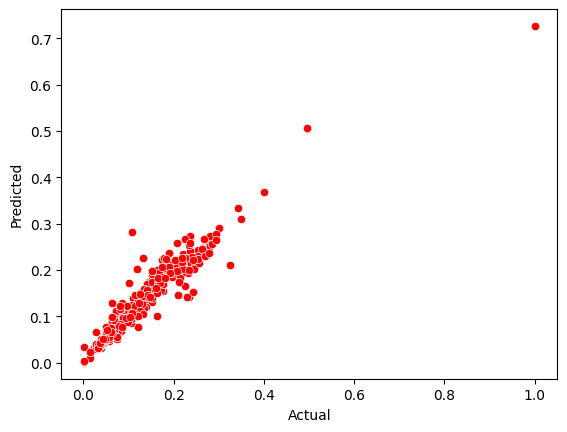

             Score
R2 Score  0.900241
MAE       0.017966
MSE       0.001002
RMSE      0.031652


In [45]:
print(Evaluation_Metrics_Regression(RF, X_test, Y_test))

**Hyperparameter Tuning**

In [46]:
HyperparameterTuning(X_train, Y_train, RF, search_type='grid', n_iter_random=10)

(RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42),
 {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150})

**Retrain my model after hyperparameter tuning**

In [48]:
RF1=RandomForestRegressor(n_estimators=150,max_depth=None,
  min_samples_leaf=1,
  min_samples_split= 2,
  )
RF1.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=150)

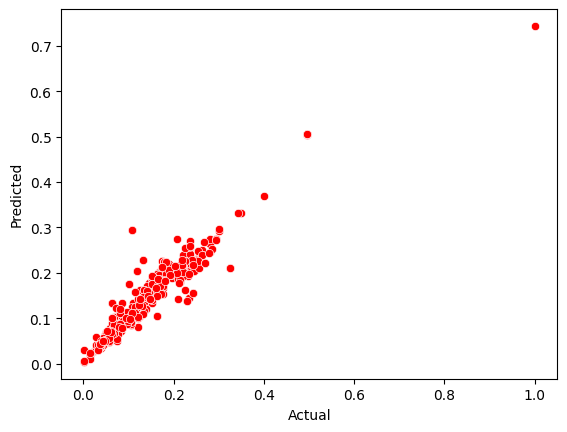

After tuning              Score
R2 Score  0.899593
MAE       0.017960
MSE       0.001008
RMSE      0.031755


In [49]:
print("After tuning",Evaluation_Metrics_Regression(RF1, X_test, Y_test))

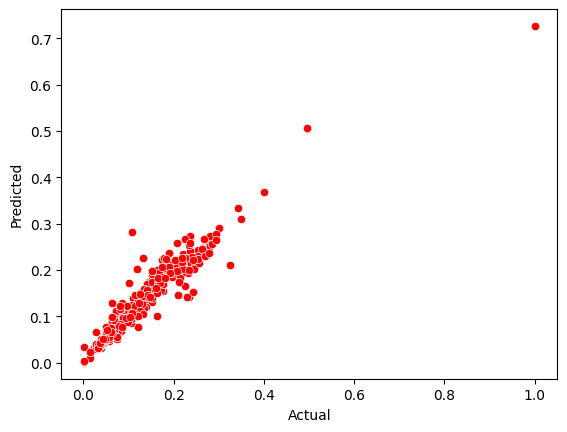

Before tuning              Score
R2 Score  0.900241
MAE       0.017966
MSE       0.001002
RMSE      0.031652


In [50]:
# @title
print("Before tuning",Evaluation_Metrics_Regression(RF, X_test, Y_test))

Out of the three models I trained, Linear Regression had the lowest R² score. Decision Tree achieved the highest score, but it's overfitting as there's a significant difference between the training and testing performance. Therefore, Random Forest is the best-performing and most balanced model, and I will select it for final deployment.

### **Saving pickle file**

In [ ]:
import pickle
with open('FarePrediction.pkl', 'wb') as file:
    pickle.dump(RF1, file)


In [ ]:
df_label_encoded.columns